模板匹配

In [37]:
import cv2    # opencv读取格式是BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def cv_show(img, name):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [38]:
# 模板匹配
img = cv2.imread('Nilou.jpg', 0)
template = cv2.imread('summer.jpg', 0)
h, w = template.shape[:2]

In [39]:
img.shape

(791, 450)

In [40]:
template.shape

(197, 197)

In [41]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [42]:
res = cv2.matchTemplate(img, template, 1)
res.shape

(595, 254)

In [43]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [44]:
min_val

0.0024438139516860247

In [45]:
max_val

0.28151851892471313

In [46]:
min_loc

(88, 210)

In [47]:
max_loc

(252, 305)

4


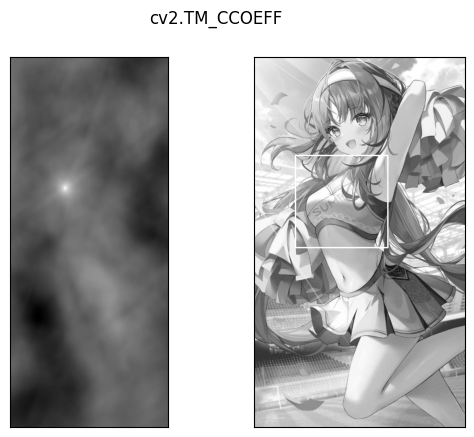

5


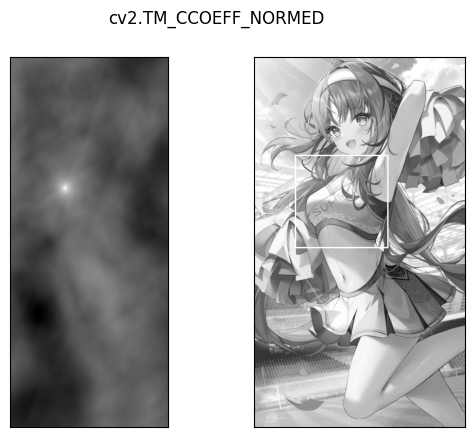

2


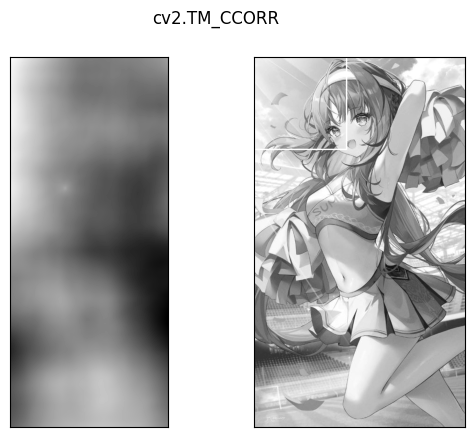

3


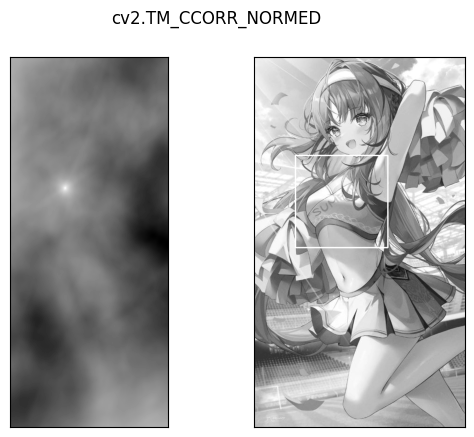

0


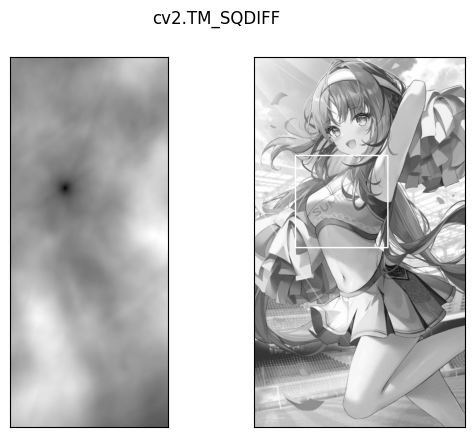

1


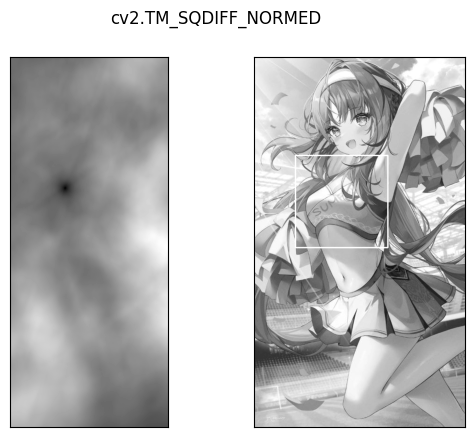

In [48]:
for meth in methods:
    img2 = img.copy()
    
    # 匹配方法的真值
    method = eval(meth)
    print (method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # 画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    
    plt.subplot(121), plt.imshow(res, cmap = 'gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap = 'gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

直方图

In [57]:
img = cv2.imread('cat.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist.shape

(256, 1)

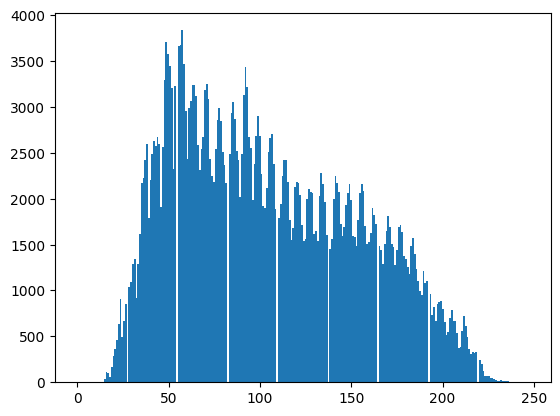

In [58]:
plt.hist(img.ravel(), 256)
plt.show()

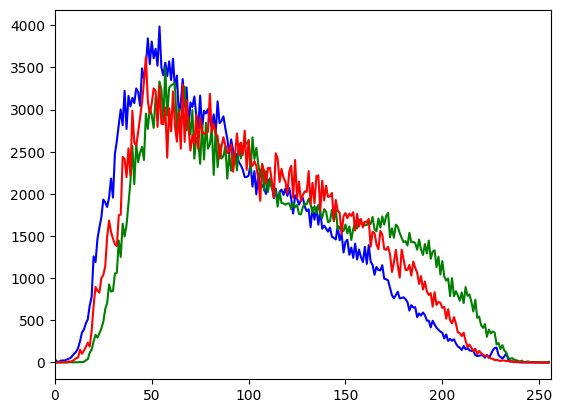

In [59]:
img = cv2.imread('cat.jpg')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

In [68]:
# 创建mask
mask = np.zeros(img.shape[:2], np.uint8)
print(mask.shape)
mask[100:400, 200:650] = 255
cv_show(mask, 'mask')

(500, 753)


In [69]:
img = cv2.imread("cat.jpg",0)
cv_show(img, 'img')

In [70]:
masked_img = cv2.bitwise_and(img, img, mask = mask) # 与操作
cv_show(masked_img, 'masked_img')

In [71]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

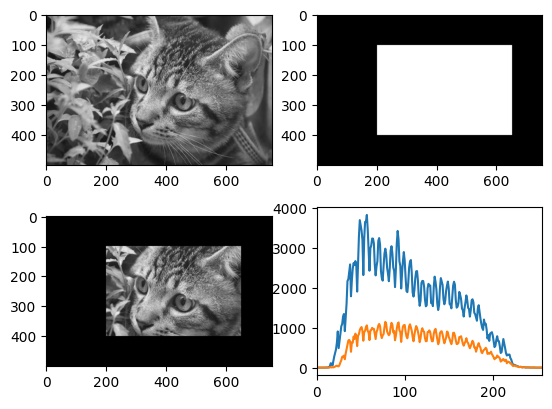

In [74]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

直方图均衡化

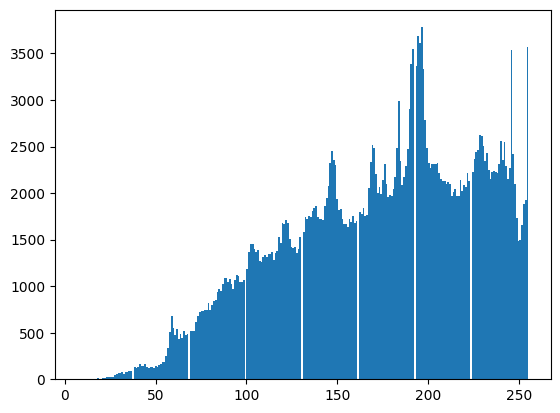

In [84]:
img = cv2.imread('Nilou.jpg', 0)
plt.hist(img.ravel(), 256)
plt.show()

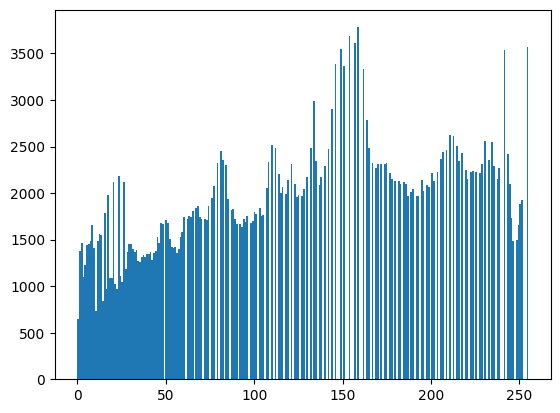

In [85]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(), 256)
plt.show()

In [86]:
res = np.hstack((img,equ))
cv_show(res, 'res')

自适应直方图均衡化

In [87]:
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))

In [88]:
res_clahe = clahe.apply(img)
res = np.hstack((img, equ, res_clahe))
cv_show(res, 'res')

傅里叶变换与滤波

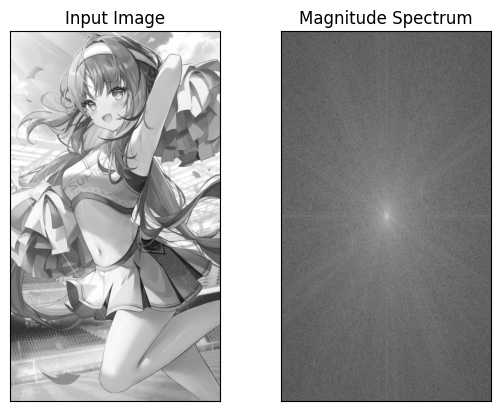

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Nilou.jpg', 0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# 得到灰度图能表现的形式
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

低通滤波(保留低频，变模糊)

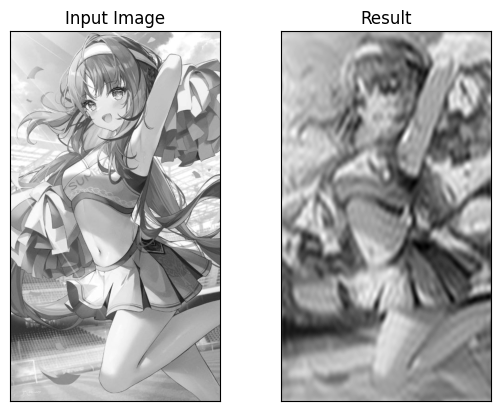

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Nilou.jpg', 0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# 低通滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30 : crow + 30, ccol - 30 : ccol + 30] = 1

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()

高通滤波（保留高频，细节增强）

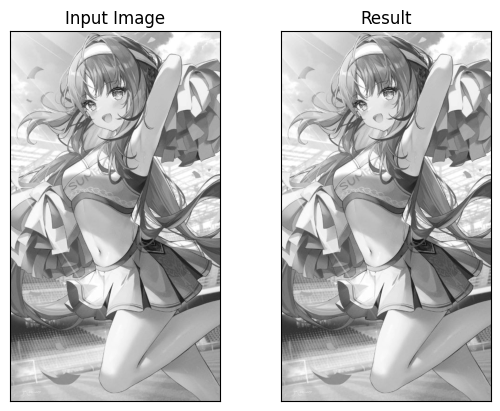

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Nilou.jpg', 0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# 低通滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow - 30 : crow + 30, ccol - 30 : ccol + 30] = 1

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()